In [1]:
# import library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# read updated csv file
df = pd.read_csv('./CleanedDataSet.csv')
df = df.drop(['Unnamed: 0'], axis=1) # removed unnamed column
df.columns

Index(['Player', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'High_Score', 'Avg',
       'Ball_Faced', 'Strike_Rate', '100', '50', '0', '4s', '6s', 'Debut_Year',
       'Final_Year', 'Country', 'Career_Length'],
      dtype='object')

In [19]:
## Who has the highest batting average in Test cricket history?

In [23]:
# Sort DataFrame by 'Avg' in descending order
top_batsmen = df.sort_values(by="Avg", ascending=False).head(10)
top_batsmen.head(2)

Player  Matches  Inns  Not_Outs  Runs  High_Score        Avg  \
0  DG Bradman        52    80        10  6996         334  99.942857   
1    AC Voges        20    31         7  1485         269  61.870000   

  Ball_Faced  Strike_Rate  100  50  0   4s  6s  Debut_Year  Final_Year  \
0      9800+        58.60   29  13  7  626   6        1928        1948   
1       2667        55.68    5   4  2  186   5        2015        2016   

  Country  Career_Length  
0     AUS             20  
1     AUS              1

In [29]:
# Set figure size
plt.figure(figsize=(11, 5))

# Bar plot using Seaborn
sns.barplot(
    x="Avg", 
    y="Player", 
    data=top_batsmen, 
    palette="viridis",
    hue="Player",
)

# Title and Labels
plt.title("Top 10 Highest Career Batting Averages in Test Cricket", fontsize=12)
plt.xlabel("Batting Average", fontsize=10)
plt.ylabel("Player", fontsize=10)

# Show exact values on bars
for index, value in enumerate(top_batsmen["Avg"]):
    plt.text(value + 1, index, f"{value:.2f}", va="center", fontsize=8)

plt.show()

In [ ]:
## How does the batting average correlate with the number of matches played?

In [40]:
# Calculate correlation coefficient
correlation = df["Matches"].corr(df["Avg"])
print(f"Correlation Coefficient: {correlation:.3f}")

## Correlation is negative, which means average tends to decline as player plays more matches.
### Example: Sachin Tendulkar (avg = 52, matches = 200) and DG Bradman (avg = 99, matches = 52)

## But, correlation is close to 0(zero), which means relation is weak, which further means 
## player may or may not experience low avg with more number of matches

Correlation Coefficient: -0.146


In [41]:
# Set plot style for better visuals
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(8, 4))
sns.regplot(
    x="Matches", 
    y="Avg", 
    data=df, 
    scatter_kws={"color": "blue", "alpha": 0.6}, 
    line_kws={"color": "red"}
)
plt.title("Correlation between Matches Played and Batting Average", fontsize=12)
plt.xlabel("Matches Played", fontsize=10)
plt.ylabel("Batting Average", fontsize=10)
plt.show()

In [ ]:
## Lest split data into different groups (e.g., players with <50 Tests vs. 50+ Tests) to check if correlation changes?

In [79]:
# Splitting the data
short_career = df[df["Matches"] < 50]
long_career = df[df["Matches"] >= 50]
long_career = long_career[long_career["Player"]!="DG Bradman "]
print(short_career.shape)
print(long_career.shape)

(22, 18)
(38, 18)


In [80]:
# Calculate correlation separately
corr_short = short_career["Matches"].corr(short_career["Avg"])
corr_long = long_career["Matches"].corr(long_career["Avg"])
print(f"Short Correlation Coefficient: {corr_short:.3f}, \nLong Correlation Coefficient: {corr_long:.3f}")

Short Correlation Coefficient: 0.028, 
Long Correlation Coefficient: -0.150


In [83]:
## Short term players relation is almost zero mean there there avg doest matter with number of matches they played.
## Long term players relation is still weak negative they might notice decline in avg.

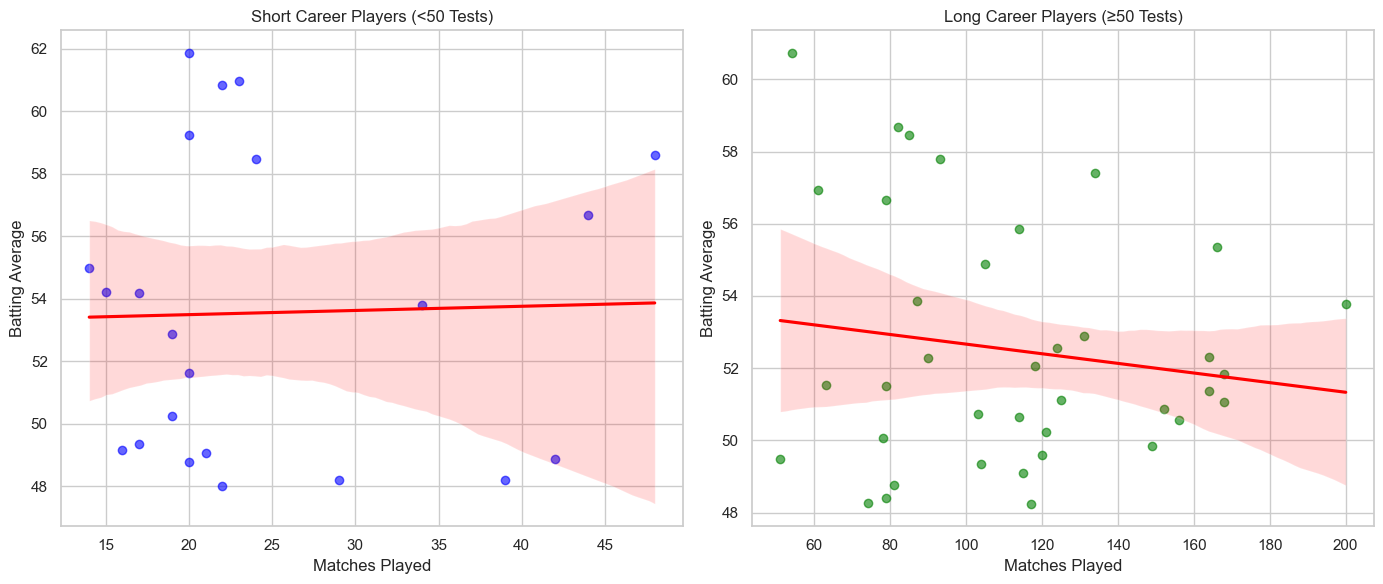

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Short Career Players
sns.regplot(
    x="Matches", y="Avg", data=short_career, 
    scatter_kws={"color": "blue", "alpha": 0.6}, 
    line_kws={"color": "red"}, ax=axes[0]
)
axes[0].set_title("Short Career Players (<50 Tests)")
axes[0].set_xlabel("Matches Played")
axes[0].set_ylabel("Batting Average")

# Long Career Players
sns.regplot(
    x="Matches", y="Avg", data=long_career, 
    scatter_kws={"color": "green", "alpha": 0.6}, 
    line_kws={"color": "red"}, ax=axes[1]
)
axes[1].set_title("Long Career Players (â‰¥50 Tests)")
axes[1].set_xlabel("Matches Played")
axes[1].set_ylabel("Batting Average")
plt.tight_layout()
plt.show()

In [42]:
## What is the average number of centuries (100s) scored by players with a batting average above 50?

In [90]:
players_above_50_avg = df[df['Avg'] > 50]
players_above_50_avg.shape

(44, 18)

In [92]:
average_centuries = players_above_50_avg['100'].mean()
total_players_above_50 = len(players_above_50_avg)
print(f"The total number of players with a batting average >= 50 is: {total_players_above_50}")
print(f"The average number of centuries scored by players with a batting average above 50 is: {average_centuries:.2f}")

The total number of players with a batting average >= 50 is: 44
The average number of centuries scored by players with a batting average above 50 is: 20.82


In [93]:
## What is the distribution of batting averages for players with over 50 matches?

In [96]:
players_above_50_matches = df[df['Matches'] > 50]
players_above_50_matches.shape

(39, 18)

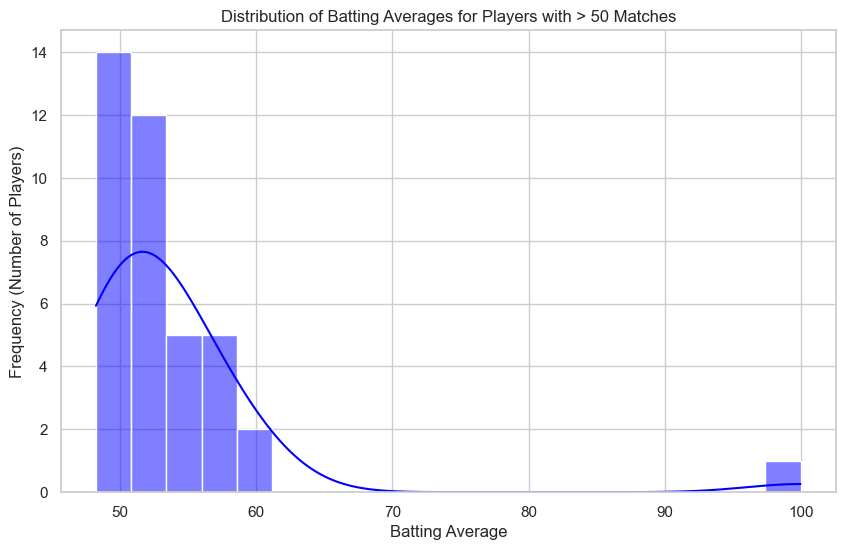

In [101]:
# Plot the distribution of batting averages for players with more than 50 matches
plt.figure(figsize=(10, 6))
sns.histplot(players_above_50_matches['Avg'], kde=True, color='blue', bins=20)
plt.title('Distribution of Batting Averages for Players with > 50 Matches')
plt.xlabel('Batting Average')
plt.ylabel('Frequency (Number of Players)')
plt.show()

In [ ]:
## How many players have maintained a batting average above 50 across different eras (pre-1950s, 1950s-2000s, post-2000s)?

In [112]:
pre_1950s = players_above_50_avg[players_above_50_avg['Debut_Year'] < 1950]
post_1950s_2000s = players_above_50_avg[(players_above_50_avg['Debut_Year'] >= 1950) & (players_above_50_avg['Debut_Year'] <= 2000)]
post_2000s = players_above_50_avg[players_above_50_avg['Debut_Year'] > 2000]

# Count the number of players in each era
player_counts = [len(pre_1950s), len(post_1950s_2000s), len(post_2000s)]
print(player_counts)
post_2000s.head()

[13, 22, 9]


Player  Matches  Inns  Not_Outs  Runs  High_Score    Avg  \
1        AC Voges        20    31         7  1485         269  61.87   
8        HC Brook        24    40         1  2281         317  58.48   
15      SPD Smith       114   204        25  9999         239  55.86   
18  KS Williamson       105   186        17  9276         251  54.88   
25    YBK Jaiswal        19    36         2  1798         214  52.88   

   Ball_Faced  Strike_Rate  100  50   0    4s  6s  Debut_Year  Final_Year  \
1        2667        55.68    5   4   2   186   5        2015        2016   
8        2581        88.37    8  10   2   246  37        2022        2024   
15      18671        53.55   34  41  11  1094  58        2010        2025   
18      17913        51.78   33  37  11  1031  27        2010        2024   
25       2738        65.66    4  10   3   207  39        2023        2025   

   Country  Career_Length  
1      AUS              1  
8      ENG              2  
15     AUS             15  
18      NZ             14  
25     IND              2

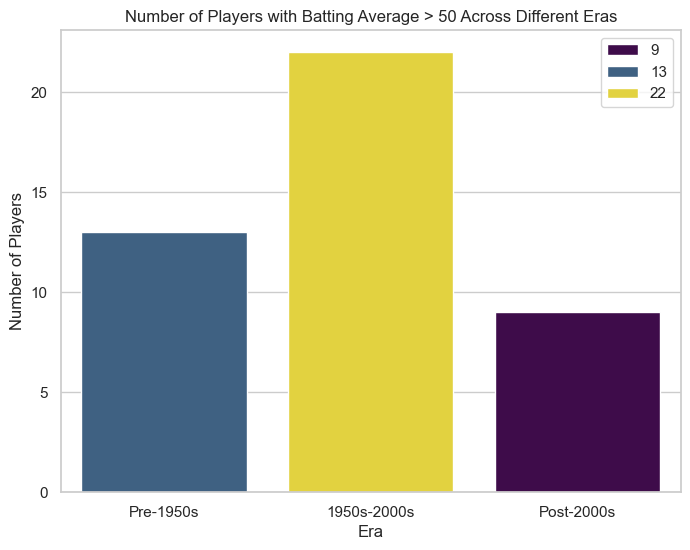

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Pre-1950s', '1950s-2000s', 'Post-2000s'], y=player_counts, palette="viridis", hue=player_counts)
plt.title("Number of Players with Batting Average > 50 Across Different Eras")
plt.xlabel("Era")
plt.ylabel("Number of Players")
plt.show()